<a href="https://colab.research.google.com/github/LouisDo2108/MediaEval2021Fakenews/blob/master/FakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! for for in for; do for=for; done; echo $for

for


# Import libraries 

In [ ]:
!pip install transformers
!pip install -q tf-models-official
!pip install pyyaml h5py
!pip install emoji
!pip install bert-for-tf2
!pip install emot --upgrade
!pip install git+https://github.com/fucaja/ekphrasis.git
!pip install keras-rl2

     |████████████████████████████████| 3.1 MB 5.4 MB/s 
     |████████████████████████████████| 895 kB 27.6 MB/s 
     |████████████████████████████████| 59 kB 5.5 MB/s 
     |████████████████████████████████| 3.3 MB 32.0 MB/s 
     |████████████████████████████████| 596 kB 46.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.8 MB 5.3 MB/s 
     |████████████████████████████████| 1.1 MB 28.4 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 352 kB 39.2 MB/s 
     |████████████████████████████████| 47.6 MB 35 kB/s 
     |████████████████████████████████| 1.2 MB 35.7 MB/s 
     |████████████████████████████████| 99 kB 8.5 MB/s 
     |████████████████████████████████| 213 kB 46.1 MB/s 
     |████████████████████████████████| 4.9 MB 31.5 MB/s 
     |████████████████████████████████| 90 kB 6.

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import confusion_matrix, matthews_corrcoef, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import tensorflow_addons as tfa

import torch

from official.nlp import optimization
from bert import bert_tokenization
from transformers import BertModel, BertTokenizer, BertConfig, TFAutoModelForSequenceClassification, AutoModel, AutoTokenizer

In [ ]:
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from emoji import demojize
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO 
from ekphrasis.classes.segmenter import Segmenter
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
import wordcloud

nltk.download
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Define data custom class

In [ ]:
#@title
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
#@title
text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
        'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
        'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags <hashtag>
    unpack_contractions=True,  # Unpack contractions (can't -> can not) <number>
    spell_correct_elong=True,  # spell correction for elongated words <Repeated>
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
)

/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [ ]:
#@title
import string
class dataset():
    
    def __init__(self, data_path):
        # self.df = pd.read_csv(data_path, encoding='utf-8', sep='\t', names=['index', 'label', 'text'])
        self.df = pd.read_csv(data_path, encoding='utf-8')#, names=['index', 'label', 'text'])
        self.data = None
        
    def __len__(self):
        return self.df.size
    
    def __str__(self):
        return print(self.df)

    def __getitem__(self, indices):
        return str(self.df.text[indices])

    def extract_metadata(self):
      
      # word_count
      self.df['word_count'] = self.df['text'].apply(lambda x: len(str(x).split()))

      # unique_word_count
      self.df['unique_word_count'] = self.df['text'].apply(lambda x: len(set(str(x).split())))

      # stop_word_count
      self.df['stop_word_count'] = self.df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

      # url_count
      self.df['url_count'] = self.df['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

      # mean_word_length
      self.df['mean_word_length'] = self.df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

      # char_count
      self.df['char_count'] = self.df['text'].apply(lambda x: len(str(x)))

      # punctuation_count
      self.df['punctuation_count'] = self.df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

      # hashtag_count
      self.df['hashtag_count'] = self.df['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

      # mention_count
      self.df['mention_count'] = self.df['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

      # extract meta features
      # self.df['hashtag'] = self.df['text'].apply(lambda x: re.findall(r"#(\w+)", x))
      # self.df['mention'] = self.df['text'].apply(lambda x: re.findall(r"@mention'", x))
      return

    def preprocessing(self):

        # Add labels row and drop index column
        self.df.dropna(inplace = True)
        # self.df.drop('index', axis=1, inplace=True)
        # self.df.text = self.df.text.astype(str)

        # convert categorical labels to numerical labels
        self.df.label = pd.Categorical(self.df.label)
        self.df['label'] = self.df.label.cat.codes

        self.df.loc[:, 'text'] =self.df.text.apply(lambda x: x.lower()) #lower case
        self.df.loc[:, 'text'] =self.df.text.str.replace('’', '\'')
        self.df.drop_duplicates(subset=None, keep="first", inplace=True)

        # expand contractions
        def expand_contractions(text):
          text = ' '.join([contractions.get(i, i) for i in text.split()])
          return text
        self.df.loc[:, 'text'] = self.df.text.apply(lambda x: expand_contractions(x))
        self.df.loc[:, 'text'] =self.df.text.str.replace('#', '')
        table = str.maketrans('', '', string.punctuation)
        regex = re.compile('[%s]' % re.escape(string.punctuation))
        self.df.loc[:, 'text'] =self.df.text.apply(lambda x: regex.sub('', x))

        self.df.loc[:, 'text'] =self.df.text.str.replace("\xc2\xa0", '') #remove bad space
        # self.df.loc[:, 'text'] =self.df.text.apply(lambda x:re.sub(r'[^\w\s]',' ',str(x), re.UNICODE)) #remove punctuation

        #  Expand slang, abbr:
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\s4\s', ' for ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r"\s2\s", ' to ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'[a-zA-Z]2[a-zA-Z]', ' to ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\sw\/\s', ' with ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\sb\/c\s', ' because ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\sb4\s', ' before ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\scre8\s', ' create ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\sda\s', ' the ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\sya\s', ' you ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\slol\s', ' laughing out loud ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'lol\s', ' laughing out loud ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\slol', ' laughing out loud ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\sf2f\s', ' face to face ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\sfomo\s', ' fear of missing out ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\sftw\s', ' for the win ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\slol\s', ' laughing out loud ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\slmao\s', ' laughing my ass out ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\sic\s', ' i see ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\skk\s', ' okay ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\sprt\s', ' please retweet ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\ssp\s', ' sponsored ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\stbh\s', ' to be honest ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\sb\s', ' be ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\sr\s', ' are ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\sc\s', ' see ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\bu\b', ' you ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\bu\b', ' you ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\by\b', ' why ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\bq\b', ' qanon ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\bq\b', ' qanon ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\sppl\s*', ' people ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\sbjp\s', ' bharatiya janata party ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\sblm\s', ' black lives matter ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\scld\s', ' could ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\schk\s', ' check ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\sbtw\s', ' by the way ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\sbrb\s', ' be right back ')
        self.df.loc[:, 'text'] =self.df.text.str.replace(r'\swtv\s', ' whatever ')

        # extract url domain
        def domain_name(url):
          exurl = url.split("//")[-1].split("/")[0].split('?')[0]
          if exurl != None:
            return exurl
          return url

        def replace_url_placeholder(index):
          links = self.df.url[index]

          if(len(links) <= 0):
            return self.df.text[index]
        
          sentence = self.df.text[index]
          for i in range(len(links)):
            sentence = re.sub(r"_url", str(links[i]), str(sentence), count = 1)
          return sentence

        self.df['url'] = self.df['text'].apply(lambda x: re.findall(r"\b((?:https?://)?(?:(?:www\.)?(?:[\da-z\.-]+)\.(?:[a-z]{2,6})|(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)|(?:(?:[0-9a-fA-F]{1,4}:){7,7}[0-9a-fA-F]{1,4}|(?:[0-9a-fA-F]{1,4}:){1,7}:|(?:[0-9a-fA-F]{1,4}:){1,6}:[0-9a-fA-F]{1,4}|(?:[0-9a-fA-F]{1,4}:){1,5}(?::[0-9a-fA-F]{1,4}){1,2}|(?:[0-9a-fA-F]{1,4}:){1,4}(?::[0-9a-fA-F]{1,4}){1,3}|(?:[0-9a-fA-F]{1,4}:){1,3}(?::[0-9a-fA-F]{1,4}){1,4}|(?:[0-9a-fA-F]{1,4}:){1,2}(?::[0-9a-fA-F]{1,4}){1,5}|[0-9a-fA-F]{1,4}:(?:(?::[0-9a-fA-F]{1,4}){1,6})|:(?:(?::[0-9a-fA-F]{1,4}){1,7}|:)|fe80:(?::[0-9a-fA-F]{0,4}){0,4}%[0-9a-zA-Z]{1,}|::(?:ffff(?::0{1,4}){0,1}:){0,1}(?:(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])|(?:[0-9a-fA-F]{1,4}:){1,4}:(?:(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])))(?::[0-9]{1,4}|[1-5][0-9]{4}|6[0-4][0-9]{3}|65[0-4][0-9]{2}|655[0-2][0-9]|6553[0-5])?(?:/[\w\.-]*)*/?)\b", str(x)))
        self.df['text'] = self.df['text'].apply(lambda x: re.sub(r"\b((?:https?://)?(?:(?:www\.)?(?:[\da-z\.-]+)\.(?:[a-z]{2,6})|(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)|(?:(?:[0-9a-fA-F]{1,4}:){7,7}[0-9a-fA-F]{1,4}|(?:[0-9a-fA-F]{1,4}:){1,7}:|(?:[0-9a-fA-F]{1,4}:){1,6}:[0-9a-fA-F]{1,4}|(?:[0-9a-fA-F]{1,4}:){1,5}(?::[0-9a-fA-F]{1,4}){1,2}|(?:[0-9a-fA-F]{1,4}:){1,4}(?::[0-9a-fA-F]{1,4}){1,3}|(?:[0-9a-fA-F]{1,4}:){1,3}(?::[0-9a-fA-F]{1,4}){1,4}|(?:[0-9a-fA-F]{1,4}:){1,2}(?::[0-9a-fA-F]{1,4}){1,5}|[0-9a-fA-F]{1,4}:(?:(?::[0-9a-fA-F]{1,4}){1,6})|:(?:(?::[0-9a-fA-F]{1,4}){1,7}|:)|fe80:(?::[0-9a-fA-F]{0,4}){0,4}%[0-9a-zA-Z]{1,}|::(?:ffff(?::0{1,4}){0,1}:){0,1}(?:(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])|(?:[0-9a-fA-F]{1,4}:){1,4}:(?:(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])))(?::[0-9]{1,4}|[1-5][0-9]{4}|6[0-4][0-9]{3}|65[0-4][0-9]{2}|655[0-2][0-9]|6553[0-5])?(?:/[\w\.-]*)*/?)\b", '_url', str(x)))
        self.df['url'] = self.df['url'].apply(lambda x: [domain_name(url) for url in x])
        
        for i in range(len(self.df.text)):
            if len(self.df.url.values[i]) > 0:
                self.df.loc[i, 'text'] = replace_url_placeholder(i)

        # convert emoji and emoticons to text
        def convert_emoticons(text):
          for emot in EMOTICONS_EMO:
            text = text.replace(emot, "_".join(re.split(',| ',EMOTICONS_EMO[emot])))
          return text

        self.df.loc[:, 'text'] =self.df.text.apply(lambda x: demojize(x)) #emoji      
        self.df.loc[:, 'text'] =self.df.text.apply(lambda x: convert_emoticons(x)) #emoticon


        # remove videos and links
        self.df.loc[:, 'text'] = self.df.text.str.replace('{link}', '')
        self.df.loc[:, 'text'] = self.df.text.str.replace("\[video\]", '')
        
        self.df.loc[:, 'text'] =self.df.text.str.replace('&[a-z]+;', '')
        self.df.loc[:, 'text'] =self.df.text.str.replace(' {2,}', ' ')
        self.df.loc[:, 'text'] =self.df.text.str.replace('^.^', 'smile')
          
        self.df.loc[:, 'text'] = self.df.text.apply(lambda x: " ".join(text_processor.pre_process_doc(x)))
        
        self.data = self.df[['label', 'text']]
        self.data.drop_duplicates(inplace=True)

# Prepare preprocessed dataset

In [ ]:
data_path = "/content/drive/MyDrive/FakeNews/Data/new/extended_from_dev3.csv"
df = dataset(data_path)
df.preprocessing()
df.data.to_csv('/content/drive/MyDrive/FakeNews/Data/extended-preprocessed.csv', encoding='utf-8', index=False)
### uncomment and run this cell if you run for raw data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/FakeNews/Data/extended-preprocessed.csv")
df

,label,text
0,0,globalistnews you know that the coronavirus is...
1,0,do not listen to world health organization the...
2,0,there are reports that china has over <number>...
3,0,mms which is mainly bleach is also being used ...
4,0,the source is known wuhans p4 bioweapons labs ...
...,...,...
1048,0,the level of disregard for churchesspiritual h...
1049,0,please go through sirs posts of the past <numb...
1050,0,for now we do what we think will save us from ...
1051,2,plandemic not a pandemic the goal is depopulat...


In [ ]:
labelZero = df.loc[df['label'] == 0].sample(frac=1, random_state=42).head(500)
labelOne = df.loc[df['label'] == 1]
labelTwo = df.loc[df['label'] == 2]

In [ ]:
type(labelZero)

pandas.core.frame.DataFrame

In [ ]:
extend = pd.read_csv("/content/drive/MyDrive/FakeNews/Data/extended-preprocessed-extracted.csv")
extend


,label,text
0,0,yeah have also considered false hope false fla...
1,0,i like it to a spiritual check up have i been ...
2,0,dear honourable prime minister narendra modiji...
3,0,ny governor cuomo wrote a book in the middle o...
4,0,that scares me i am on chemo have low immune s...
...,...,...
612,2,when covid falls apart and everyone rejoices t...
613,2,corruption what else they stood up to the path...
614,2,be realistic if covid is tb <number> daysjune4...
615,2,deep state actors have their orders do not sto...


In [ ]:
original = pd.read_csv("/content/drive/MyDrive/FakeNews/Data/new/combine-train.csv")
original

,label,text
0,2,so many people are blinded that it has it is b...
1,1,obviously just do not tell me that you think a...
2,0,it has it is our choice and that has that is t...
3,0,remember gop run by seditionistsqanon supporte...
4,2,the two main reasons for this plandemic is the...
...,...,...
1210,0,fort detrick is a united states army medical c...
1211,2,avoiding conflict with the us is a strategy fo...
1212,0,you know buti was what africa has a stubborn p...
1213,2,plandemic not a pandemic the goal is depopulat...


In [ ]:
|X_train, X_test, y_train, y_test = train_test_split(
...     new_df.text.values, new_df.label.values, test_size=0.2, random_state=42, stratify=new_df.label.values)

In [ ]:
temp = pd.read_csv("/content/drive/MyDrive/FakeNews/Data/new/combine-extended-train.csv")

In [ ]:
temp

,label,text
0,2,so many people are blinded that it has it is b...
1,1,obviously just do not tell me that you think a...
2,0,it has it is our choice and that has that is t...
3,0,remember gop run by seditionistsqanon supporte...
4,2,the two main reasons for this plandemic is the...
...,...,...
1827,2,when covid falls apart and everyone rejoices t...
1828,2,corruption what else they stood up to the path...
1829,2,be realistic if covid is tb <number> daysjune4...
1830,2,deep state actors have their orders do not sto...


In [ ]:
y_train = y_train.reshape(len(y_train), 1)
X_train = X_train.reshape(len(X_train), 1)
y_test = y_test.reshape(len(y_test), 1)
X_test = X_test.reshape(len(X_test), 1)

In [ ]:
train = np.hstack((np.array(y_train), np.array(X_train)))
test = np.hstack((np.array(y_test), np.array(X_test)))

In [ ]:
# train_df.to_csv('/content/drive/MyDrive/FakeNews/Data/combine-train.csv', encoding='utf-8', index=False)
train_df.to_csv('/content/drive/MyDrive/FakeNews/Data/combine-train-forAug.csv', encoding='utf-8', index=False, sep='\t')
# test_df.to_csv('/content/drive/MyDrive/FakeNews/Data/combine-test.csv', encoding='utf-8', index=False)

In [ ]:
###    EDA
!git clone https://github.com/jasonwei20/eda_nlp.git
!python eda_nlp/code/augment.py --input=/content/drive/MyDrive/FakeNews/Data/combine-train-forAug.csv --output=/content/drive/MyDrive/FakeNews/Data/combine-train-augmented.csv --num_aug=8 --alpha_sr=0.05 --alpha_rd=0.1 --alpha_ri=0.1 --alpha_rs=0.1

fatal: destination path 'eda_nlp' already exists and is not an empty directory.
generated augmented sentences with eda for /content/drive/MyDrive/FakeNews/Data/combine-train-forAug.csv to /content/drive/MyDrive/FakeNews/Data/combine-train-augmented.csv with num_aug=8


In [ ]:
train_aug = pd.read_csv('/content/drive/MyDrive/FakeNews/Data/combine-train-augmented.csv')

In [ ]:
# train_aug.to_csv('/content/drive/MyDrive/FakeNews/Data/combine-train-augmented.csv', index=False)
train_aug

,lable,text
0,2,so many people are blinded that it bill gates ...
1,2,chipped are people are blinded that it has it ...
2,2,so many people are blinded that it has it is b...
3,2,radiation therapy so many people are blinded t...
4,2,so electric cell explore many people are blind...
...,...,...
10930,0,even the to is made up covid is the result fro...
10931,0,even the to is made up covid is the result fro...
10932,0,even the to is made up covid is a it from a wa...
10933,0,even to is up covid the result from a nanitern...


# Define tokenizer

In [ ]:
MAX_SEQUENCE_LENGTH = 64

PRETRAINED_MODEL_NAME = "digitalepidemiologylab/covid-twitter-bert-v2"#"digitalepidemiologylab/covid-twitter-bert/2" #'vinai/bertweet-covid19-base-uncased' 

# Number of labels:
number_of_label = 3#train['label'].nunique()

def batch_encode(X, tokenizer):
    return tokenizer.batch_encode_plus(
    X,
    max_length=MAX_SEQUENCE_LENGTH, # set the length of the sequences
    add_special_tokens=True, # add [CLS] and [SEP] tokens
    return_attention_mask=True,
    truncation = True,
    return_token_type_ids=True, # not needed for this type of ML task
    padding='max_length', # add 0 pad tokens to the sequences less than max_length
    return_tensors='tf'
)

def CreateModel(model_class, tokenizer_class, pretrained_weights):
  model_class, tokenizer_class, pretrained_weights = (model_class, tokenizer_class, pretrained_weights)

  tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
  return tokenizer

tokenizer = CreateModel(AutoModel, AutoTokenizer, PRETRAINED_MODEL_NAME)

Downloading:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/421 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

# Extract features for sklearn models

In [ ]:
from transformers import AutoModel

data_path = "/content/drive/MyDrive/FakeNews/Data/new/old-preprocessed.csv"
data = pd.read_csv(data_path)

def CreateModel(model_class, tokenizer_class, pretrained_weights):
  model_class, tokenizer_class, pretrained_weights = (model_class, tokenizer_class, pretrained_weights)

  tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
  model = model_class.from_pretrained(pretrained_weights, output_hidden_states=True)
  return tokenizer, model

tokenizer, model = CreateModel(AutoModel, AutoTokenizer, PRETRAINED_MODEL_NAME)

def batch_encode(X, tokenizer):
    return tokenizer.batch_encode_plus(
    X,
    max_length=MAX_SEQUENCE_LENGTH, # set the length of the sequences
    add_special_tokens=True, # add [CLS] and [SEP] tokens
    return_attention_mask=True,
    truncation = True,
    return_token_type_ids=True,
    padding='max_length', # add 0 pad tokens to the sequences less than max_length
    return_tensors='pt'
)

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Some weights of the model checkpoint at digitalepidemiologylab/covid-twitter-bert-v2 were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import gc

def save_embedding_mini_batch(data_size, batch_size, model, path, filename, X_train):
  
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model.to(device)

  for batch in range(0, int(data_size / batch_size) + 1):
    torch.cuda.empty_cache()

    # mini_batch_input_ids = X_train['input_ids'][batch*batch_size:]
    # mini_batch_attention_mask = X_train['attention_mask'][batch*batch_size:]
    # mini_batch_token_type_ids = X_train['token_type_ids'][batch*batch_size:]

    print("Batch {}".format(batch))

    if (batch+1)*batch_size > data_size:
      mini_batch_input_ids = X_train['input_ids'][batch*batch_size:]
      mini_batch_attention_mask = X_train['attention_mask'][batch*batch_size:]
      mini_batch_token_type_ids = X_train['token_type_ids'][batch*batch_size:]
    else:
      mini_batch_input_ids = X_train['input_ids'][batch*batch_size:(batch+1)*batch_size]
      mini_batch_attention_mask = X_train['attention_mask'][batch*batch_size:(batch+1)*batch_size]
      mini_batch_token_type_ids = X_train['token_type_ids'][batch*batch_size:(batch+1)*batch_size]

    with torch.no_grad():
      output = model(input_ids=mini_batch_input_ids.to(device), attention_mask=mini_batch_attention_mask.to(device), token_type_ids=mini_batch_token_type_ids.to(device))
    
    print(len(output[2]))
    output = list(output[2])
    filepath = path + filename + str(batch) + ".pt"
    print(filepath)

    torch.save(output, filepath)
    print("saved")

    del output
    gc.collect()
print("Done")

Done


In [ ]:
X_train = batch_encode(list(data.text.values), tokenizer)

In [ ]:
X_train.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
batch_size = len(data) + 1
data_size = len(data)
path = "/content/drive/MyDrive/FakeNews/fakenews_embeddings/"
filename = "original-v2"
save_embedding_mini_batch(data_size, batch_size, model, path, filename, X_train)

Batch 0
25
/content/drive/MyDrive/FakeNews/fakenews_embeddings/original-v20.pt
saved


In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)

# Define models

In [ ]:
#concat
def create_cat_model(max_sequence, model_name, num_labels):

    input_word_ids = tf.keras.layers.Input(shape=(max_sequence,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.layers.Input(shape=(max_sequence,), dtype=tf.int32, name="input_mask") 
    input_type_ids = tf.keras.layers.Input(shape=(max_sequence,),dtype=tf.int32,name="input_type_ids")

    model = TFAutoModelForSequenceClassification.from_pretrained(model_name, trainable=False, output_hidden_states = True)
    out = model(input_ids = input_word_ids, attention_mask = input_mask, token_type_ids = input_type_ids)
    out1, out2, out3, out4 = out.hidden_states[-1], out.hidden_states[-2], out.hidden_states[-3], out.hidden_states[-4]
    cat = tf.concat([out1, out2, out3, out4], axis=-1)
    cat = tf.keras.layers.Flatten()(cat)

    initializer = tf.keras.initializers.TruncatedNormal(stddev=0.2)

    output = tf.keras.layers.Dense(1024, activation=tf.nn.gelu, kernel_regularizer=tf.keras.regularizers.L2(0.0001))(cat)
    output = tf.keras.layers.ReLU()(output)
    output = tf.keras.layers.Dropout(rate=0.5)(output)
    output = tf.keras.layers.BatchNormalization()(output)

    output = tf.keras.layers.Dense(512, activation=tf.nn.gelu, kernel_regularizer=tf.keras.regularizers.L2(0.0001))(output)
    output = tf.keras.layers.ReLU()(output)
    output = tf.keras.layers.Dropout(rate=0.5)(output)
    output = tf.keras.layers.BatchNormalization()(output)

    output = tf.keras.layers.Dense(256, activation=tf.nn.gelu, kernel_regularizer=tf.keras.regularizers.L2(0.0001))(output)
    output = tf.keras.layers.ReLU()(output)
    output = tf.keras.layers.Dropout(rate=0.5)(output)
    output = tf.keras.layers.BatchNormalization()(output)

    output = tf.keras.layers.Dense(num_labels, kernel_initializer=initializer, name='output', activation='softmax')(output)

    classifier_model = tf.keras.Model(
    inputs={
          'input_word_ids': input_word_ids,
          'input_mask': input_mask,
          'input_type_ids': input_type_ids},
          outputs=output)
    classifier_model.summary()
    return classifier_model

In [ ]:
#mean
def create_mean_model(max_sequence, model_name, num_labels):

    input_word_ids = tf.keras.layers.Input(shape=(max_sequence,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.layers.Input(shape=(max_sequence,), dtype=tf.int32, name="input_mask") 
    input_type_ids = tf.keras.layers.Input(shape=(max_sequence,),dtype=tf.int32,name="input_type_ids")

    model = TFAutoModelForSequenceClassification.from_pretrained(model_name, trainable=False, output_hidden_states = True)
    out = model(input_ids = input_word_ids, attention_mask = input_mask, token_type_ids = input_type_ids)
    out1, out2, out3, out4 = out.hidden_states[-1], out.hidden_states[-2], out.hidden_states[-3], out.hidden_states[-4]
    mean = tf.reduce_mean([out1, out2, out3, out4], 0)
    mean = tf.keras.layers.Flatten()(mean)

    initializer = tf.keras.initializers.TruncatedNormal(stddev=0.2)

    output = tf.keras.layers.Dense(1024)(mean)
    output = tf.keras.layers.LeakyReLU(alpha=0.2)(output)
    output = tf.keras.layers.Dropout(rate=0.5)(output)
    output = tf.keras.layers.BatchNormalization()(output)

    output = tf.keras.layers.Dense(512)(output)
    output = tf.keras.layers.LeakyReLU(alpha=0.2)(output)
    output = tf.keras.layers.Dropout(rate=0.5)(output)
    output = tf.keras.layers.BatchNormalization()(output)

    output = tf.keras.layers.Dense(256)(output)
    output = tf.keras.layers.LeakyReLU(alpha=0.2)(output)
    output = tf.keras.layers.Dropout(rate=0.5)(output)
    output = tf.keras.layers.BatchNormalization()(output)

    output = tf.keras.layers.Dense(num_labels, kernel_initializer=initializer, name='output', activation='softmax')(output)

    classifier_model = tf.keras.Model(
    inputs={
          'input_word_ids': input_word_ids,
          'input_mask': input_mask,
          'input_type_ids': input_type_ids},
          outputs=output)
    classifier_model.summary()
    return classifier_model

In [ ]:
#@title
#last hidden states
def create_lhs_model(max_sequence, model_name, num_labels):

    input_word_ids = tf.keras.layers.Input(shape=(max_sequence,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.layers.Input(shape=(max_sequence,), dtype=tf.int32, name="input_mask") 
    input_type_ids = tf.keras.layers.Input(shape=(max_sequence,),dtype=tf.int32,name="input_type_ids")

    model = TFAutoModelForSequenceClassification.from_pretrained(model_name, trainable=False, output_hidden_states=True)
    out = model(input_ids = input_word_ids, attention_mask = input_mask, token_type_ids = input_type_ids)
    last_hidden_states = out.hidden_states[-1]
    # out1, out2, out3, out4 = out.hidden_states[-1], out.hidden_states[-2], out.hidden_states[-3], out.hidden_states[-4]
    # sum = tf.reduce_sum([out1, out2, out3, out4], 0)
    last_hidden_states = tf.keras.layers.Flatten()(last_hidden_states)

    initializer = tf.keras.initializers.TruncatedNormal(stddev=0.2)

    output = tf.keras.layers.Dense(1024)(last_hidden_states)
    output = tf.keras.layers.LeakyReLU(alpha=0.2)(output)
    output = tf.keras.layers.Dropout(rate=0.3)(output)
    output = tf.keras.layers.BatchNormalization()(output)

    output = tf.keras.layers.Dense(512)(output)
    output = tf.keras.layers.LeakyReLU(alpha=0.2)(output)
    output = tf.keras.layers.Dropout(rate=0.3)(output)
    output = tf.keras.layers.BatchNormalization()(output)

    output = tf.keras.layers.Dense(256)(output)
    output = tf.keras.layers.LeakyReLU(alpha=0.2)(output)
    output = tf.keras.layers.Dropout(rate=0.3)(output)
    output = tf.keras.layers.BatchNormalization()(output)
    output = tf.keras.layers.Dense(num_labels, kernel_initializer=initializer, name='output', activation='softmax')(output)

    classifier_model = tf.keras.Model(
    inputs={
          'input_word_ids': input_word_ids,
          'input_mask': input_mask,
          'input_type_ids': input_type_ids},
          outputs=output)
    return classifier_model

In [ ]:
#@title
#sum
def create_sum_model(max_sequence, model_name, num_labels):

    input_word_ids = tf.keras.layers.Input(shape=(max_sequence,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.layers.Input(shape=(max_sequence,), dtype=tf.int32, name="input_mask") 
    input_type_ids = tf.keras.layers.Input(shape=(max_sequence,),dtype=tf.int32,name="input_type_ids")

    model = TFAutoModelForSequenceClassification.from_pretrained(model_name, trainable=False, output_hidden_states = True)
    out = model(input_ids = input_word_ids, attention_mask = input_mask, token_type_ids = input_type_ids)
    out1, out2, out3, out4 = out.hidden_states[-1], out.hidden_states[-2], out.hidden_states[-3], out.hidden_states[-4]
    sum = tf.reduce_sum([out1, out2, out3, out4], 0)
    sum = tf.keras.layers.Flatten()(sum)

    initializer = tf.keras.initializers.TruncatedNormal(stddev=0.2)

    output = tf.keras.layers.Dense(1024)(sum)
    output = tf.keras.layers.LeakyReLU(alpha=0.2)(output)
    output = tf.keras.layers.Dropout(rate=0.5)(output)
    output = tf.keras.layers.BatchNormalization()(output)

    output = tf.keras.layers.Dense(512)(output)
    output = tf.keras.layers.LeakyReLU(alpha=0.2)(output)
    output = tf.keras.layers.Dropout(rate=0.5)(output)
    output = tf.keras.layers.BatchNormalization()(output)

    output = tf.keras.layers.Dense(256)(output)
    output = tf.keras.layers.LeakyReLU(alpha=0.2)(output)
    output = tf.keras.layers.Dropout(rate=0.5)(output)
    output = tf.keras.layers.BatchNormalization()(output)

    output = tf.keras.layers.Dense(num_labels, kernel_initializer=initializer, name='output', activation='softmax')(output)

    classifier_model = tf.keras.Model(
    inputs={
          'input_word_ids': input_word_ids,
          'input_mask': input_mask,
          'input_type_ids': input_type_ids},
          outputs=output)
    return classifier_model

In [ ]:
#@title
#conv1d
def create_conv1d_model(max_sequence, model_name, num_labels):

    input_word_ids = tf.keras.layers.Input(shape=(max_sequence,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.layers.Input(shape=(max_sequence,), dtype=tf.int32, name="input_mask") 
    input_type_ids = tf.keras.layers.Input(shape=(max_sequence,),dtype=tf.int32,name="input_type_ids")

    model = TFAutoModelForSequenceClassification.from_pretrained(model_name, trainable=False, output_hidden_states = True)
    out = model(input_ids = input_word_ids, attention_mask = input_mask, token_type_ids = input_type_ids)
    out1, out2, out3, out4 = out.hidden_states[-1], out.hidden_states[-2], out.hidden_states[-3], out.hidden_states[-4]
    cat = tf.concat([out1, out2, out3, out4], axis=-1)

    conv1 = tf.keras.layers.Conv1D(filters=256, kernel_size=3)(cat)
    conv1 = tf.keras.layers.MaxPool1D()(conv1)
    # conv1 = tf.keras.layers.GlobalMaxPooling1D()(conv1)
    conv1 = tf.keras.layers.Dropout(rate=0.5)(conv1)
    conv1 = tf.keras.layers.BatchNormalization()(conv1)
    conv1 = tf.keras.layers.LeakyReLU()(conv1)
    conv1 = tf.keras.layers.Flatten()(conv1)

    conv2 = tf.keras.layers.Conv1D(filters=256, kernel_size=4)(cat)
    conv2 = tf.keras.layers.MaxPool1D()(conv2)
    # conv2 = tf.keras.layers.GlobalMaxPooling1D()(conv2)
    conv2 = tf.keras.layers.Dropout(rate=0.5)(conv2)
    conv2 = tf.keras.layers.LeakyReLU()(conv2)
    conv2 = tf.keras.layers.BatchNormalization()(conv2)
    conv2 = tf.keras.layers.Flatten()(conv2)

    conv3 = tf.keras.layers.Conv1D(filters=256, kernel_size=5)(cat)
    conv3 = tf.keras.layers.MaxPool1D()(conv3)
    # conv3 = tf.keras.layers.GlobalMaxPooling1D()(conv3)
    conv3 = tf.keras.layers.Dropout(rate=0.5)(conv3)
    conv3 = tf.keras.layers.LeakyReLU()(conv3)
    conv3 = tf.keras.layers.BatchNormalization()(conv3)
    conv3 = tf.keras.layers.Flatten()(conv3)

    cat = tf.concat([conv1, conv2, conv3], axis=-1)

    initializer = tf.keras.initializers.TruncatedNormal(stddev=0.2)

    layer1 = tf.keras.layers.Dense(1024)(cat)
    layer2 = tf.keras.layers.BatchNormalization()(layer1)
    layer3 = tf.keras.layers.LeakyReLU(alpha=0.2)(layer2)
    layer4 = tf.keras.layers.Dropout(rate=0.5)(layer3)

    output = tf.keras.layers.Dense(512)(layer4)
    output = tf.keras.layers.BatchNormalization()(output)
    output = tf.keras.layers.LeakyReLU(alpha=0.2)(output)
    output = tf.keras.layers.Dropout(rate=0.5)(output)

    output = tf.keras.layers.Dense(256)(output)
    output = tf.keras.layers.BatchNormalization()(output)
    output = tf.keras.layers.LeakyReLU(alpha=0.2)(output)
    output = tf.keras.layers.Dropout(rate=0.5)(output)

    output = tf.keras.layers.Dense(num_labels, kernel_initializer=initializer, name='output', activation='softmax')(output)

    classifier_model = tf.keras.Model(
    inputs={
          'input_word_ids': input_word_ids,
          'input_mask': input_mask,
          'input_type_ids': input_type_ids},
          outputs=output)
    return classifier_model

# Prepare data for training

In [ ]:
# original
train_path = "/content/drive/MyDrive/FakeNews/Data/new/combine-train.csv"
train = pd.read_csv(train_path)

# augmented
train_aug_path = "/content/drive/MyDrive/FakeNews/Data/new/combine-train-augmented.csv"
train_aug = pd.read_csv(train_aug_path)

#test
test_path = "/content/drive/MyDrive/FakeNews/Data/new/combine-test.csv"
test = pd.read_csv(test_path)

X_train, y_train = train.text.values, train.label.values
X_train_aug, y_train_aug = train_aug.text.values, train_aug.label.values
X_test, y_test = test.text.values, test.label.values

In [ ]:
X_train = batch_encode(list(X_train), tokenizer)
X_train_aug = batch_encode(list(X_train_aug), tokenizer)
X_test = batch_encode(list(X_test), tokenizer)

# Train the model

In [ ]:
MAX_SEQUENCE_LENGTH = 64

PRETRAINED_MODEL_NAME = "digitalepidemiologylab/covid-twitter-bert-v2"#"digitalepidemiologylab/covid-twitter-bert/2" #'vinai/bertweet-covid19-base-uncased' 

# Number of labels:
number_of_label = 3#train['label'].nunique()

models = [create_cat_model(MAX_SEQUENCE_LENGTH, PRETRAINED_MODEL_NAME, number_of_label)]
        #   create_mean_model(MAX_SEQUENCE_LENGTH, PRETRAINED_MODEL_NAME, number_of_label)]
        #   create_lhs_model(MAX_SEQUENCE_LENGTH, PRETRAINED_MODEL_NAME, number_of_label)]

Downloading:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at digitalepidemiologylab/covid-twitter-bert-v2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 64)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 64)]         0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 64)]         0                                            
__________________________________________________________________________________________________
tf_bert_for_sequence_classifica TFSequenceClassifier 335143938   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [ ]:
tf.compat.v1.reset_default_graph()
filepaths = ['/content/drive/MyDrive/FakeNews/Models/Combine_aug/cat_aug_v3.hdf5']
            #  '/content/drive/MyDrive/FakeNews/Models/Combine_aug/mean_aug_v2.hdf5']

acc = []
val_acc = []
loss = []
val_loss = []

predict_acc = []
cm = []
mcc = []

BATCH_SIZE = 256
EPOCHS = 5

In [ ]:
for i, m in enumerate(models):
    filepath = filepaths[i]
    checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             save_weights_only=True,
                             mode='min')

    callbacks = [checkpoint]
    tf.compat.v1.reset_default_graph()

    model = m

    opt = tfa.optimizers.AdamW(weight_decay=0.01 ,learning_rate=5e-05)

    model.compile(optimizer=opt, 
                  loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics='SparseCategoricalAccuracy')

    
    history = model.fit(
        x={'input_word_ids': X_train_aug['input_ids'], 'input_mask': X_train_aug['attention_mask'], 'input_type_ids': X_train_aug['token_type_ids']},
        y=y_train_aug,
        # validation_split=0.2, # for original data
        validation_data=({'input_word_ids': X_test['input_ids'], 'input_mask': X_test['attention_mask'], 'input_type_ids': X_test['token_type_ids']}, y_test), # for augmented data
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=callbacks
        )
    
    acc.append(list(history.history['sparse_categorical_accuracy']))
    val_acc.append(list(history.history['val_sparse_categorical_accuracy']))
    loss.append(list(history.history['loss']))
    val_loss.append(list(history.history['val_loss']))

    model.load_weights(filepath)
    model.evaluate(
        x={'input_word_ids': X_test['input_ids'], 'input_mask': X_test['attention_mask'], 'input_type_ids': X_test['token_type_ids']},
        y=y_test,
        batch_size=BATCH_SIZE)
    
    prediction = model.predict({'input_word_ids': X_test['input_ids'], 'input_mask': X_test['attention_mask'], 'input_type_ids': X_test['token_type_ids']})
    y_predicted = np.argmax(prediction, axis = 1)

    sum = 0
    for t in range(len(y_test)):
        if y_predicted[t] == y_test[t]:
            sum += 1
    predict_acc.append(sum/len(y_test))
    cm.append(list(confusion_matrix(y_test, y_predicted)))
    mcc.append(matthews_corrcoef(y_test, y_predicted))


Epoch 1/5
43/43 [==============================] - 121s 2s/step - loss: 1.4961 - sparse_categorical_accuracy: 0.5400 - val_loss: 1.1444 - val_sparse_categorical_accuracy: 0.6579

Epoch 00001: val_loss improved from inf to 1.14436, saving model to /content/drive/MyDrive/FakeNews/Models/Combine_aug/cat_aug_v3.hdf5
Epoch 2/5
43/43 [==============================] - 84s 2s/step - loss: 0.7391 - sparse_categorical_accuracy: 0.7588 - val_loss: 1.1353 - val_sparse_categorical_accuracy: 0.5033

Epoch 00002: val_loss improved from 1.14436 to 1.13525, saving model to /content/drive/MyDrive/FakeNews/Models/Combine_aug/cat_aug_v3.hdf5
Epoch 3/5
43/43 [==============================] - 83s 2s/step - loss: 0.6765 - sparse_categorical_accuracy: 0.8876 - val_loss: 1.1125 - val_sparse_categorical_accuracy: 0.4967

Epoch 00003: val_loss improved from 1.13525 to 1.11254, saving model to /content/drive/MyDrive/FakeNews/Models/Combine_aug/cat_aug_v3.hdf5
Epoch 4/5
43/43 [==============================] - 8

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


# Visualization for all 5 models

In [ ]:
mcc

[0.0]

In [ ]:
predict_acc

[0.4967105263157895]

In [ ]:
val_loss

[[1.1530272960662842,
  1.1401772499084473,
  1.1148353815078735,
  1.1028417348861694,
  1.0986613035202026]]

<Figure size 1200x800 with 0 Axes>

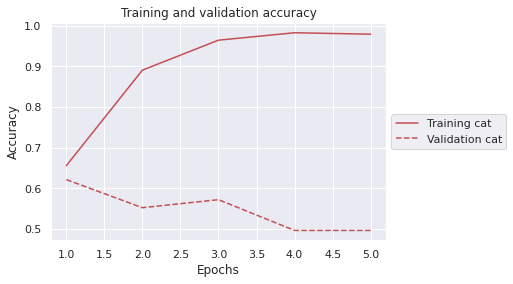

<Figure size 1200x800 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

epochs = range(1, len(acc[0]) + 1)

plt.plot(epochs, acc[0], 'r', label='Training cat')
# plt.plot(epochs, acc[1], 'g', label='Training sum')
# plt.plot(epochs, acc[1], 'b', label='Training mean')
# plt.plot(epochs, acc[2], 'y', label='Training lhs')
# plt.plot(epochs, acc[4], 'm', label='Training conv1d')
plt.plot(epochs, val_acc[0], 'r--', label='Validation cat')
# plt.plot(epochs, val_acc[1], 'g--', label='Validation sum')
# plt.plot(epochs, val_acc[1], 'b--', label='Validation mean')
# plt.plot(epochs, val_acc[2], 'y--', label='Validation lhs')
# plt.plot(epochs, val_acc[4], ',--', label='Validation con1d')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training and validation accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure(figsize=(12, 8), dpi=100)

<Figure size 1200x800 with 0 Axes>

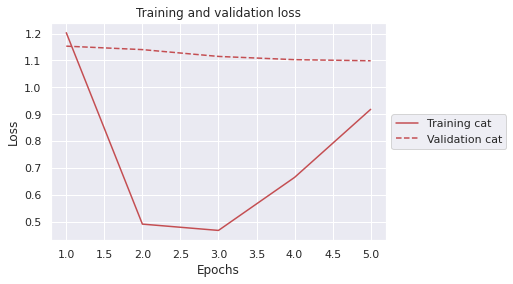

<Figure size 1200x800 with 0 Axes>

In [ ]:
plt.plot(epochs, loss[0], 'r', label='Training cat')
# plt.plot(epochs, loss[1], 'b', label='Training mean')
# plt.plot(epochs, loss[2], 'g', label='Training mean')

plt.plot(epochs, val_loss[0], 'r--', label='Validation cat')
# plt.plot(epochs, val_loss[1], 'b--', label='Validation mean')
# plt.plot(epochs, val_loss[2], 'g--', label='Validation mean')

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title('Training and validation loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure(figsize=(12, 8), dpi=100)

TypeError: ignored

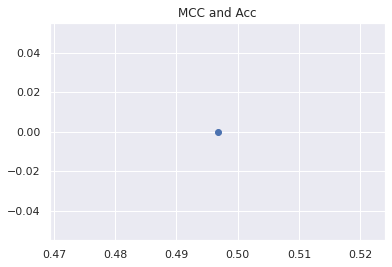

In [ ]:
colors = ['b', 'c', 'y', 'm', 'r']

lo = plt.scatter(predict_acc[0], mcc[0], marker='o', color=colors[0])
# ll = plt.scatter(predict_acc[1], mcc[1], marker='o', color=colors[1])
plt.title('MCC and Acc')

plt.legend((lo),
           ('Cat', 'Mean', 'LHS'),
        #    ('Cat', 'Sum', 'Mean', 'LHS', 'Conv1d'),
           scatterpoints=1,
           loc='center left',
           bbox_to_anchor=(1, 0.5),
           ncol=3,
           fontsize=8)
plt.ylabel("MCC")
plt.xlabel("Accuracy")

plt.figure(figsize=(192, 108), dpi=10)

plt.show()

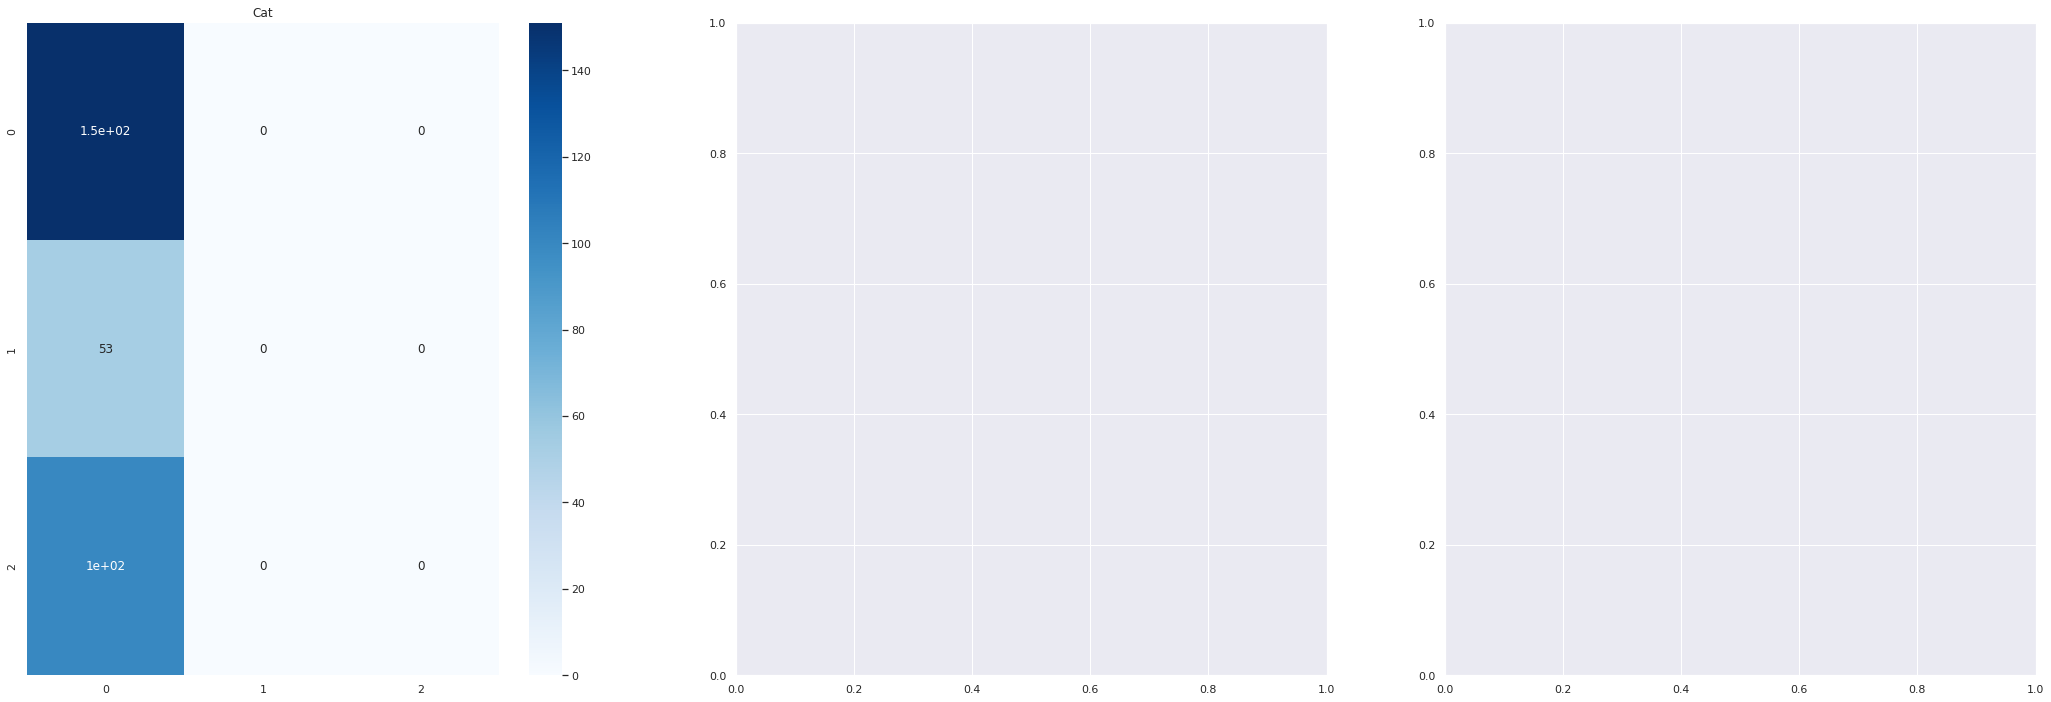

<Figure size 864x432 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(36,12))
# t = ['Cat', 'Sum', 'Mean', 'LHS', 'Conv1d']
t = ['Cat', 'Mean']


for i, m in enumerate(cm):
    axes.flat[i].title.set_text(t[i])
    df_cm = pd.DataFrame(cm[i], index = [i for i in range(3)],
                  columns = [i for i in range(3)])
    plt.figure(figsize = (12,6))
    sns.heatmap(df_cm, annot=True, cmap="Blues", ax=axes.flat[i])
plt.tight_layout()  
plt.show()

In [ ]:
model = create_cat_model(MAX_SEQUENCE_LENGTH, PRETRAINED_MODEL_NAME, number_of_label)

opt = tfa.optimizers.AdamW(weight_decay=0.01 ,learning_rate=5e-05)

model.compile(optimizer=opt, 
              loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics='SparseCategoricalAccuracy')

model.load_weights("/content/drive/MyDrive/FakeNews/Models/Combine_aug/cat_aug_v3.hdf5")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at digitalepidemiologylab/covid-twitter-bert-v2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 64)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 64)]         0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 64)]         0                                            
__________________________________________________________________________________________________
tf_bert_for_sequence_classifica TFSequenceClassifier 335143938   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

In [ ]:
model.evaluate(
        x={'input_word_ids': X_test['input_ids'], 'input_mask': X_test['attention_mask'], 'input_type_ids': X_test['token_type_ids']},
        y=y_test,
        batch_size=256)
    
prediction = model.predict({'input_word_ids': X_test['input_ids'], 'input_mask': X_test['attention_mask'], 'input_type_ids': X_test['token_type_ids']})
y_predicted = np.argmax(prediction, axis = 1)

sum = 0
for t in range(len(y_test)):
    if y_predicted[t] == y_test[t]:
        sum += 1
print(sum/len(y_test))
print(list(confusion_matrix(y_test, y_predicted)))
print(matthews_corrcoef(y_test, y_predicted))

2/2 [==============================] - 11s 391ms/step - loss: 1.0986 - sparse_categorical_accuracy: 0.4967
0.4967105263157895
[array([151,   0,   0]), array([53,  0,  0]), array([100,   0,   0])]
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [ ]:
y_test

array([0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2,
       2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1,
       0, 1, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2,
       0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2,
       1, 0, 2, 0, 1, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1,
       2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0, 2, 0,

In [ ]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,